In [2]:
from mnist import load_mnist
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Слишком сложно

In [3]:
train, validation, test = load_mnist()

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [5]:
train[0].shape, train[1].shape

((55000, 28, 28, 1), (55000,))

In [6]:
train[1]

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

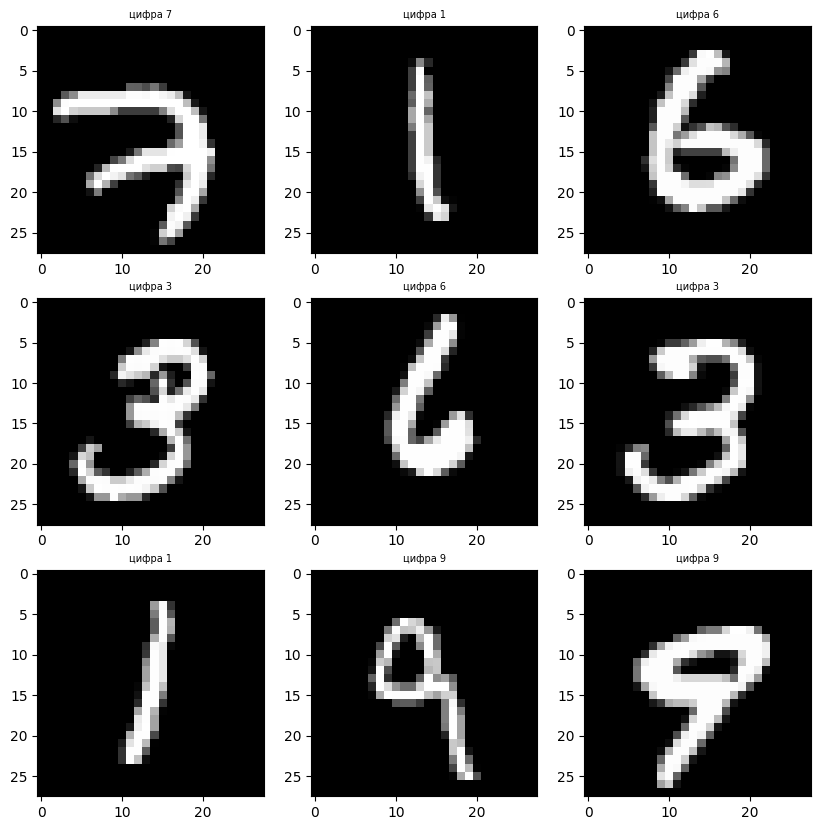

In [7]:
fig, axis = plt.subplots(3, 3, figsize = (10,10))
for i in range(3):
    for j in range(3):
        axis[i, j].imshow(train[0][i**2 + 20 * j], cmap = 'gray')
        axis[i, j].set_title('цифра ' + str(train[1][i**2 + 20 * j]), fontdict = {'fontsize':7})


In [20]:
class my_PCA(): 
    def __init__(self, n_components=None): 
        self.n_components = n_components
     
    def fit(self, X): 
        Y = np.zeros((28,28))# брать по картинкам или весь 4х мерный массив?, как брать по картинкам?
        Y[:,:] = X[:,:,0]
        Y_mean = np.mean(Y, axis = 1)
        Y -= Y_mean 
        C = Y.T.dot(Y) # конечно же не работает если брать полный 4х мерный массив
        w, v = np.linalg.eig(C)
        return Y, v, w
     
    def transform(self, X, v): 
        Y = X.dot(v)
        return Y
     
    def fit_transform(self, X):
        X_c, v, w = self.fit(X)
        Y = self.transform(X_c, v)
        if self.n_components != None:
            Y = Y[:, :(self.n_components)]
        return Y

# Для одной картинки сработало

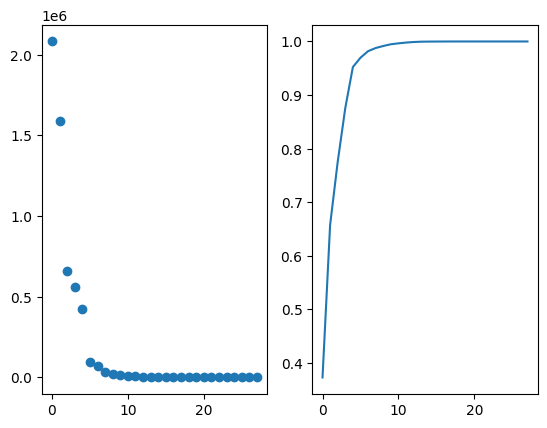

In [22]:
test = my_PCA(2)
Y, v, w = test.fit(train[0][0])
plt.subplot(1,2,1)
plt.plot(w, marker = 'o', linestyle = '')
plt.subplot(1,2,2)
plt.plot(np.cumsum(w) / np.sum(w))